In [236]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [237]:
# Укажите путь к папке с JSON-файлами
json_folder = '2024_12_15_15_31_8_num_3'

# Получение списка всех файлов с расширением .json в папке
json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

# Сортировка файлов по имени
json_files.sort()

max_files_to_process = len(json_files)  # Количество файлов для анализа
json_files = json_files[:max_files_to_process]

# Списки для данных
gps_lats, gps_lons = [], []
vio_lats, vio_lons = [], []

In [238]:
# Анализ JSON-файлов
for json_file in json_files:
    file_path = os.path.join(json_folder, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Проверяем наличие GPS и VIO
    if 'GNRMC' in data and 'VIO' in data:
        gps = data['GNRMC']
        vio = data['VIO']
        
        # GPS данные
        gps_lats.append(gps.get('lat', 0.0))
        gps_lons.append(gps.get('lon', 0.0))
        
        # VIO данные
        vio_lats.append(vio.get('lat', 0.0))
        vio_lons.append(vio.get('lon', 0.0))

In [239]:
# Функция для фильтрации данных
def clean_data(data):
    cleaned = []
    for x in data:
        # Проверяем, является ли элемент строкой
        if isinstance(x, str):
            if x and x.replace('.', '', 1).isdigit():  # Если это корректное число
                cleaned.append(float(x))
        elif isinstance(x, (float, int)):  # Если это уже число
            cleaned.append(float(x))
    return cleaned

In [240]:
# Очистка списков
gps_lats = clean_data(gps_lats)
gps_lons = clean_data(gps_lons)
vio_lats = clean_data(vio_lats)
vio_lons = clean_data(vio_lons)

In [241]:
with open("debug_points_json.txt", "w") as f:
    f.write("")
    for i in range(len(gps_lats)):
      f.write(f'Point num {i}\n')
      f.write(f'{i} point GPS lat: {gps_lats[i]}\n')
      f.write(f'{i} point VIO lat: {vio_lats[i]}\n')
      f.write(f'{i} point GPS lon: {gps_lons[i]}\n')
      f.write(f'{i} point VIO lon: {vio_lons[i]}\n')

In [242]:
# Преобразование для глобальных координат широты
#gps_lats = [ -x + 2 * 54.8894116667 for x in gps_lats]
#gps_lons = [ -x + 2 * 83.1258973333 for x in gps_lons]

In [243]:
"""for i in range(len(gps_lats)):
  print(f'Point num {i}')
  print(f'Diff between GPS and VIO: {(gps_lats[i] - vio_lats[i])}')
  print(f'GPS lat_: {gps_lats[0]}')
  print(f'VIO lat_: {vio_lats[0]}')"""

Point num 0
Diff between GPS and VIO: 0.046315807182068625
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 1
Diff between GPS and VIO: 0.04631564048207082
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 2
Diff between GPS and VIO: 0.04631597388206643
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 3
Diff between GPS and VIO: 0.046316640482068294
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 4
Diff between GPS and VIO: 0.04631647388206517
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 5
Diff between GPS and VIO: 0.046316973882063905
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 6
Diff between GPS and VIO: 0.0463168071820661
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 7
Diff between GPS and VIO: 0.04631714048206703
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 8
Diff between GPS and VIO: 0.04631764048206577
GPS lat_: 54.8894115
VIO lat_: 54.84309569281793
Point num 9
Diff between GPS and VI

In [244]:
"""for i in range(len(gps_lons)):
  print(f'Point num {i}')
  print(f'Diff between GPS and VIO: {(gps_lons[i] - vio_lons[i])}')
  print(f'GPS lon: {gps_lons[0]}')
  print(f'VIO lon: {vio_lons[0]}')"""

Point num 0
Diff between GPS and VIO: 0.027214457896192812
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 1
Diff between GPS and VIO: 0.02721479119618664
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 2
Diff between GPS and VIO: 0.027215124496194676
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 3
Diff between GPS and VIO: 0.027215624496193414
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 4
Diff between GPS and VIO: 0.0272142911961879
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 5
Diff between GPS and VIO: 0.02721412449618299
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 6
Diff between GPS and VIO: 0.027213791196189163
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 7
Diff between GPS and VIO: 0.027213957896194074
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 8
Diff between GPS and VIO: 0.027214457896192812
GPS lon: 83.1257321667
VIO lon: 83.09851770880381
Point num 9
Diff betwee

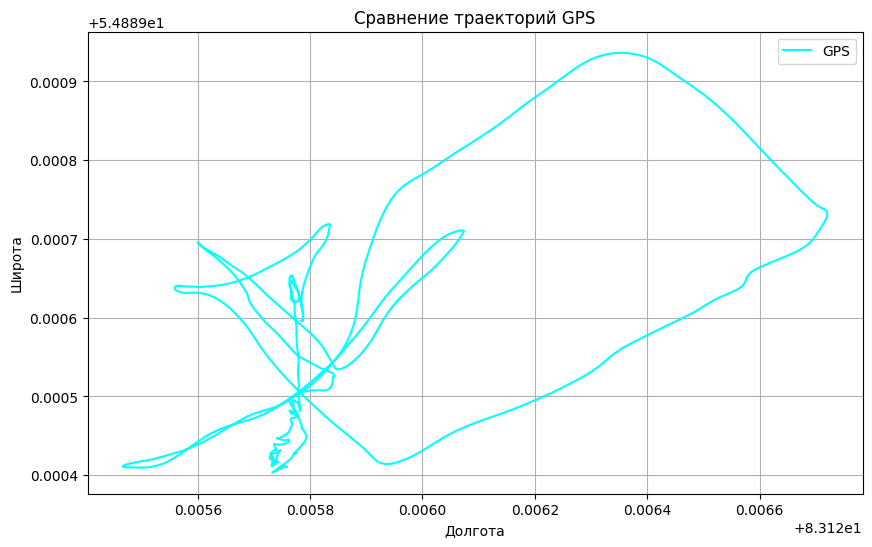

In [245]:
plt.figure(figsize=(10, 6))

plt.plot(gps_lons, gps_lats, color="cyan", label="GPS")

plt.title("Сравнение траекторий GPS")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.legend()
plt.grid()
plt.show()

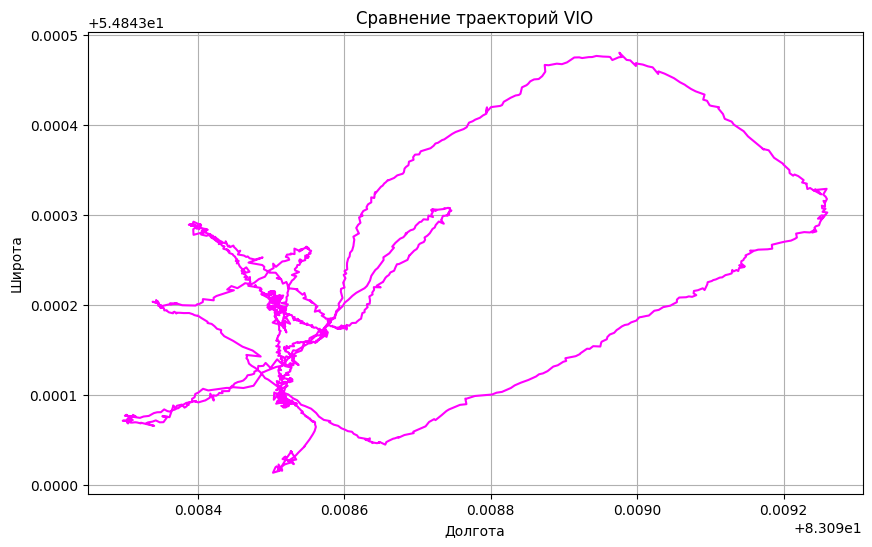

In [246]:
plt.figure(figsize=(10, 6))

plt.plot(vio_lons, vio_lats, color="magenta", label="VIO")

plt.title("Сравнение траекторий VIO")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.grid()
plt.show()

In [247]:
# Найдем минимальные и максимальные значения
gps_min_lat, gps_max_lat = np.min(gps_lats), np.max(gps_lats)
gps_min_lon, gps_max_lon = np.min(gps_lons), np.max(gps_lons)

vio_min_lat, vio_max_lat = np.min(vio_lats), np.max(vio_lats)
vio_min_lon, vio_max_lon = np.min(vio_lons), np.max(vio_lons)

# Вычислим смещение
lat_shift = (gps_min_lat + gps_max_lat) / 2 - (vio_min_lat + vio_max_lat) / 2
lon_shift = (gps_min_lon + gps_max_lon) / 2 - (vio_min_lon + vio_max_lon) / 2

# Масштабирование
lat_scale = (gps_max_lat - gps_min_lat) / (vio_max_lat - vio_min_lat)
lon_scale = (gps_max_lon - gps_min_lon) / (vio_max_lon - vio_min_lon)

# Приведение VIO к масштабу GPS
vio_lats_scaled = (vio_lats - vio_min_lat) * lat_scale + gps_min_lat
vio_lons_scaled = (vio_lons - vio_min_lon) * lon_scale + gps_min_lon

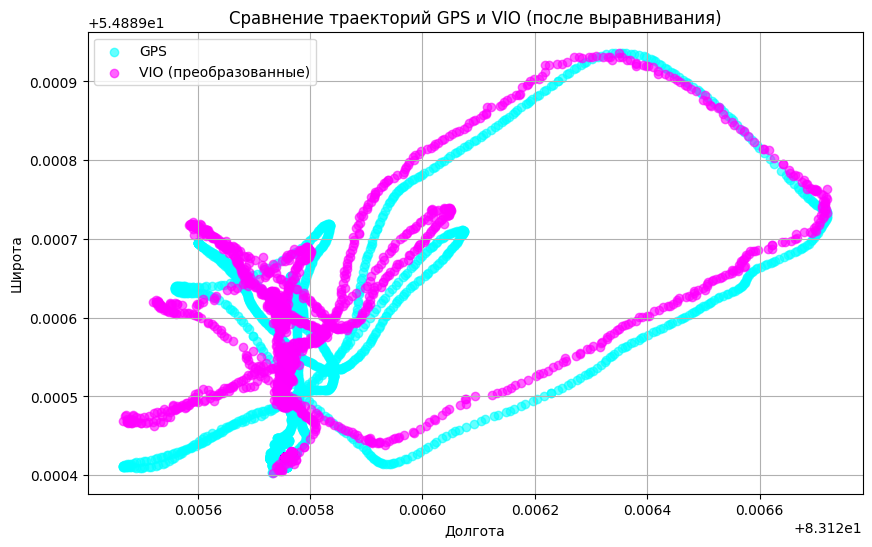

In [248]:
# Визуализация совместных данных
plt.figure(figsize=(10, 6))

# GPS точки
plt.scatter(gps_lons, gps_lats, color="cyan", label="GPS", alpha=0.6)

# VIO точки после преобразования
plt.scatter(vio_lons_scaled, vio_lats_scaled, color="magenta", label="VIO (преобразованные)", alpha=0.6)

plt.title("Сравнение траекторий GPS и VIO (после выравнивания)")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.legend()
plt.grid()
plt.show()

In [249]:
# Загрузка констант из файла
with open("vio_gps_constants.json", "r") as f:
    constants = json.load(f)

lat_shift_const = constants["lat_shift"]
lon_shift_const = constants["lon_shift"]
lat_scale_const = constants["lat_scale"]
lon_scale_const = constants["lon_scale"]

# Преобразование VIO данных
vio_lats_transformed = (vio_lats - vio_min_lat) * lat_scale_const + gps_min_lat
vio_lons_transformed = (vio_lons - vio_min_lon) * lon_scale_const + gps_min_lon

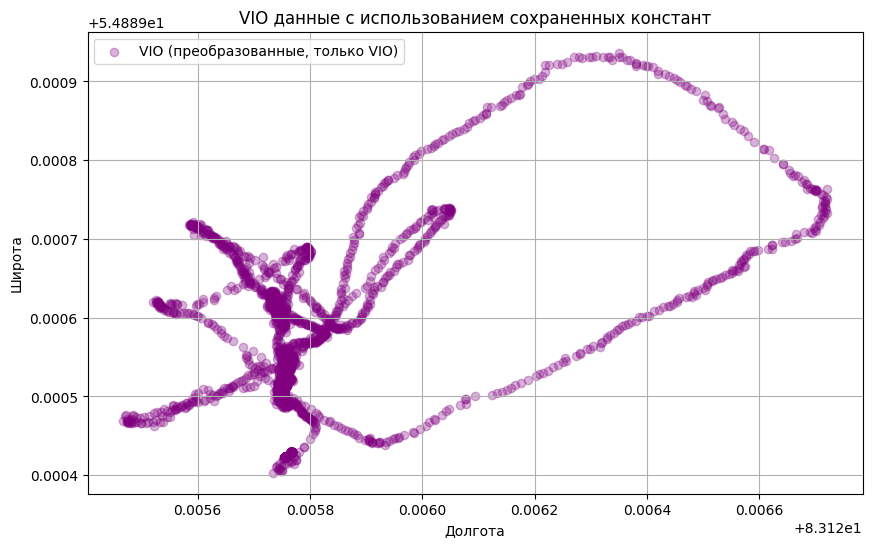

In [250]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(vio_lons_transformed, vio_lats_transformed, color="purple", label="VIO (преобразованные, только VIO)", alpha=0.3)
plt.title("VIO данные с использованием сохраненных констант")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.legend()
plt.grid()
plt.show()

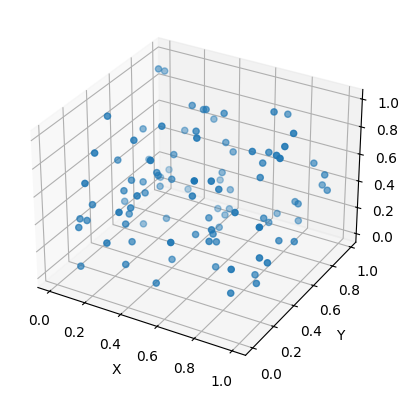

In [260]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Создаем данные для графика
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))  # Пример функции для поверхности

# Создаем фигуру и оси для 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Пример случайных точек
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Рисуем точки
ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


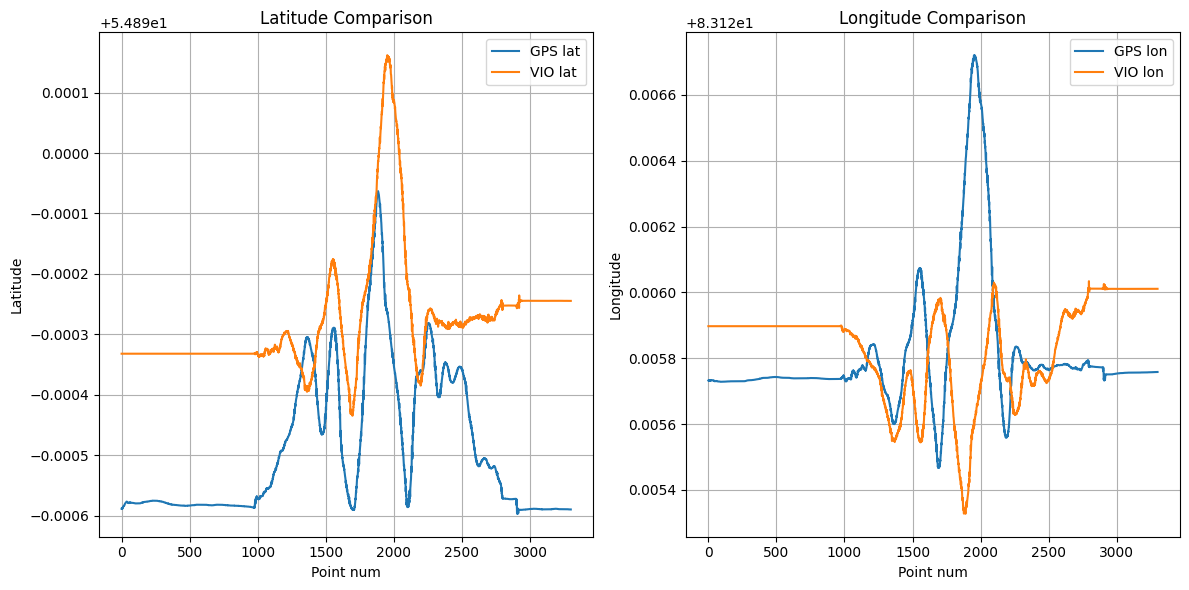

In [258]:
import matplotlib.pyplot as plt

# Функция для чтения данных из файла
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    points = {'num': [], 'gps_lat': [], 'vio_lat': [], 'gps_lon': [], 'vio_lon': []}

    for line in lines:
        line = line.strip()
        if line.startswith("Point num"):
            points['num'].append(int(line.split()[-1]))
        elif "GPS lat" in line:
            points['gps_lat'].append(float(line.split()[-1]))
        elif "VIO lat" in line:
            points['vio_lat'].append(float(line.split()[-1]))
        elif "GPS lon" in line:
            points['gps_lon'].append(float(line.split()[-1]))
        elif "VIO lon" in line:
            points['vio_lon'].append(float(line.split()[-1]))
    
    return points

# Чтение данных
file_path = "debug_points.txt"  # Замените на ваш файл
#file_path = "debug_points_json.txt"  # Замените на ваш файл
data = read_data(file_path)

# Построение графиков
plt.figure(figsize=(12, 6))

# График 1: GPS lat и VIO lat
plt.subplot(1, 2, 1)
plt.plot(data['num'], data['gps_lat'], label="GPS lat")
plt.plot(data['num'], data['vio_lat'], label="VIO lat")
plt.title("Latitude Comparison")
plt.xlabel("Point num")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# График 2: GPS lon и VIO lon
plt.subplot(1, 2, 2)
plt.plot(data['num'], data['gps_lon'], label="GPS lon")
plt.plot(data['num'], data['vio_lon'], label="VIO lon")
plt.title("Longitude Comparison")
plt.xlabel("Point num")
plt.ylabel("Longitude")
plt.legend()
plt.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()

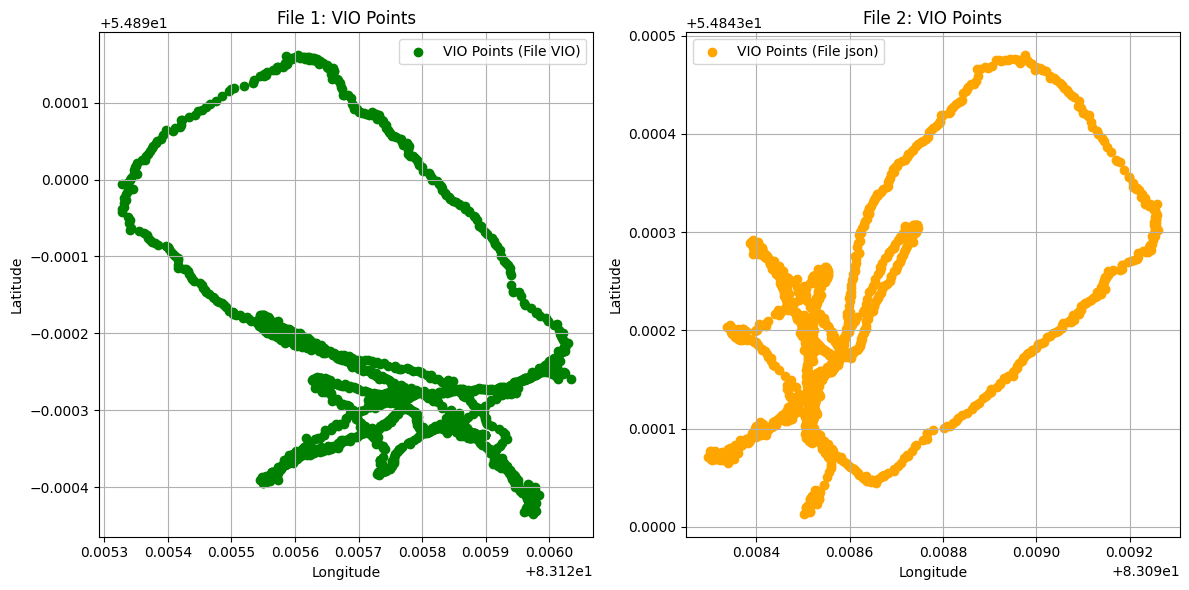

In [254]:
import matplotlib.pyplot as plt

# Функция для чтения данных из файла
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    points = {'vio_lat': [], 'vio_lon': []}

    for line in lines:
        line = line.strip()
        if "VIO lat" in line:
            points['vio_lat'].append(float(line.split()[-1]))
        elif "VIO lon" in line:
            points['vio_lon'].append(float(line.split()[-1]))
    
    return points

# Чтение данных из двух файлов
file_path_1 = "debug_points.txt"       # Замените на путь к первому файлу
file_path_2 = "debug_points_json.txt"  # Замените на путь ко второму файлу

data1 = read_data(file_path_1)
data2 = read_data(file_path_2)

# Построение графиков
plt.figure(figsize=(12, 6))

# График 1: Точки VIO из первого файла
plt.subplot(1, 2, 1)
plt.scatter(data1['vio_lon'], data1['vio_lat'], label="VIO Points (File VIO)", c='green')
plt.title("File 1: VIO Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# График 2: Точки VIO из второго файла
plt.subplot(1, 2, 2)
plt.scatter(data2['vio_lon'], data2['vio_lat'], label="VIO Points (File json)", c='orange')
plt.title("File 2: VIO Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()
